In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
codes= pd.read_excel(r'C:\Users\USER\Desktop\Applied Term Paper\Tags.xlsx')
company_codes=list(codes.columns)
prices = yf.download(company_codes, start='2020-01-01',end= '2020-07-01')['Adj Close'] 
prices = prices.drop(columns=['TURSG.IS', 'OYAKC.IS']) #No data was found on these, probably added to BIST100 late

[*********************100%***********************]  100 of 100 completed

2 Failed downloads:
- TURSG.IS: No data found for this date range, symbol may be delisted
- OYAKC.IS: No data found for this date range, symbol may be delisted


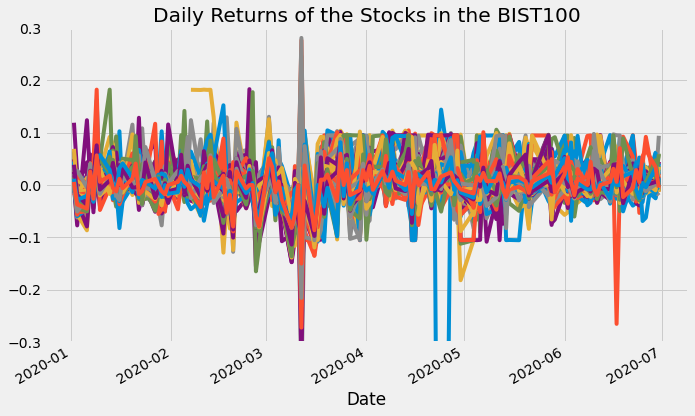

In [4]:
rs = prices.apply(np.log).diff(1) #Stationarized form, log and first lag

rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the BIST100')
plt.tight_layout()
plt.axis([None , None, -0.3, 0.3])
plt.savefig('tmp.png')

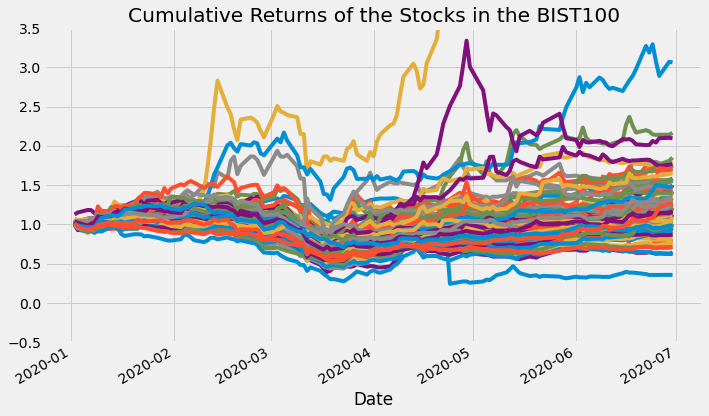

<Figure size 432x288 with 0 Axes>

In [5]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the BIST100')
plt.tight_layout()
plt.axis([None , None, -0.5, 3.5])
plt.show()
plt.savefig('tmp1.png')

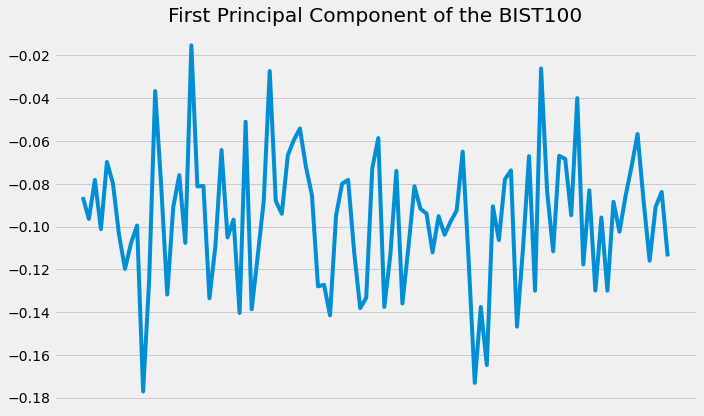

In [6]:
from sklearn.decomposition import PCA
plt.clf()
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(legend=None, figsize=(10,6), xticks=[],  grid=True, title='First Principal Component of the BIST100')
plt.tight_layout()
plt.savefig('tmp2.png')

In [7]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)

In [8]:
#BIST100 data
ind= pd.read_excel(r'C:\Users\USER\Desktop\Applied Term Paper\BIST100.xlsx').astype(float)
indexNamesArr = prices.index.values
row_labels=indexNamesArr
ind.index=row_labels

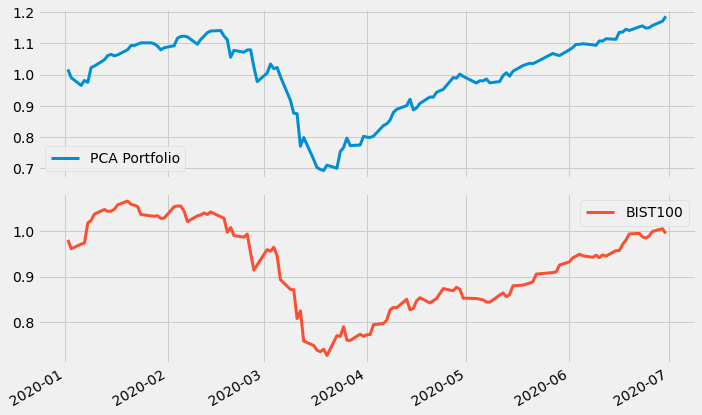

In [9]:
rs_df = pd.concat([myrs, ind.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "BIST100"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

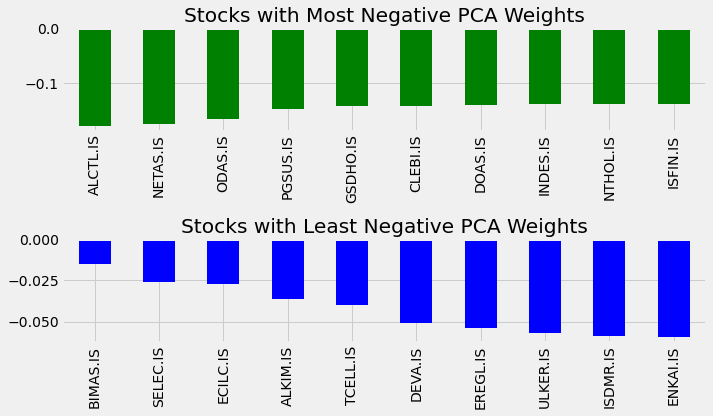

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

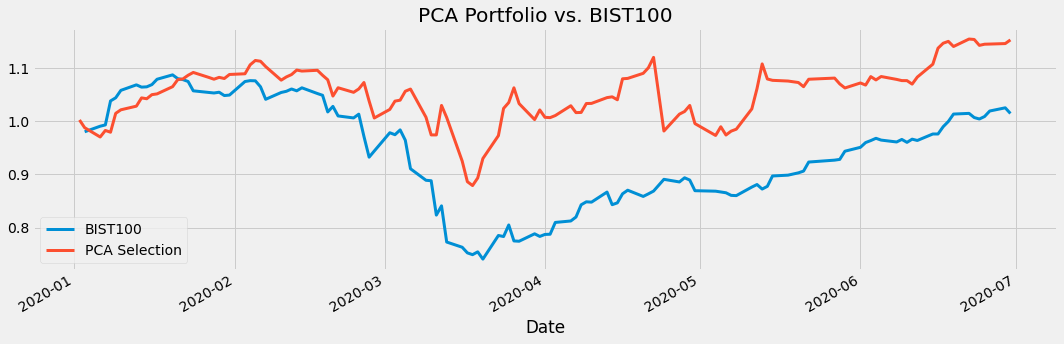

In [11]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)


ind['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. BIST100')
plt.legend(['BIST100', 'PCA Selection'])

plt.tight_layout()
plt.show()
